# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



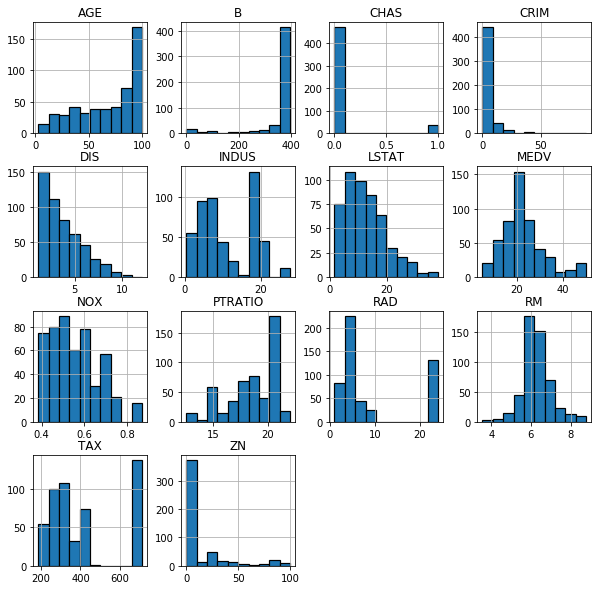

In [3]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

1. Нормальное распределение: MEDV, RM.
2. Равномерного распредления нет.
3. Биноминального - есть один кандидат это столбец RAD, но он с выбросом справа поэтому не подходит.
4. Бернулли: CHAS
5. Геометрического распределения нет
6. Логнормальное: DIS, LSTAT, NOX

In [4]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

C:\Users\gvs\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gvs\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


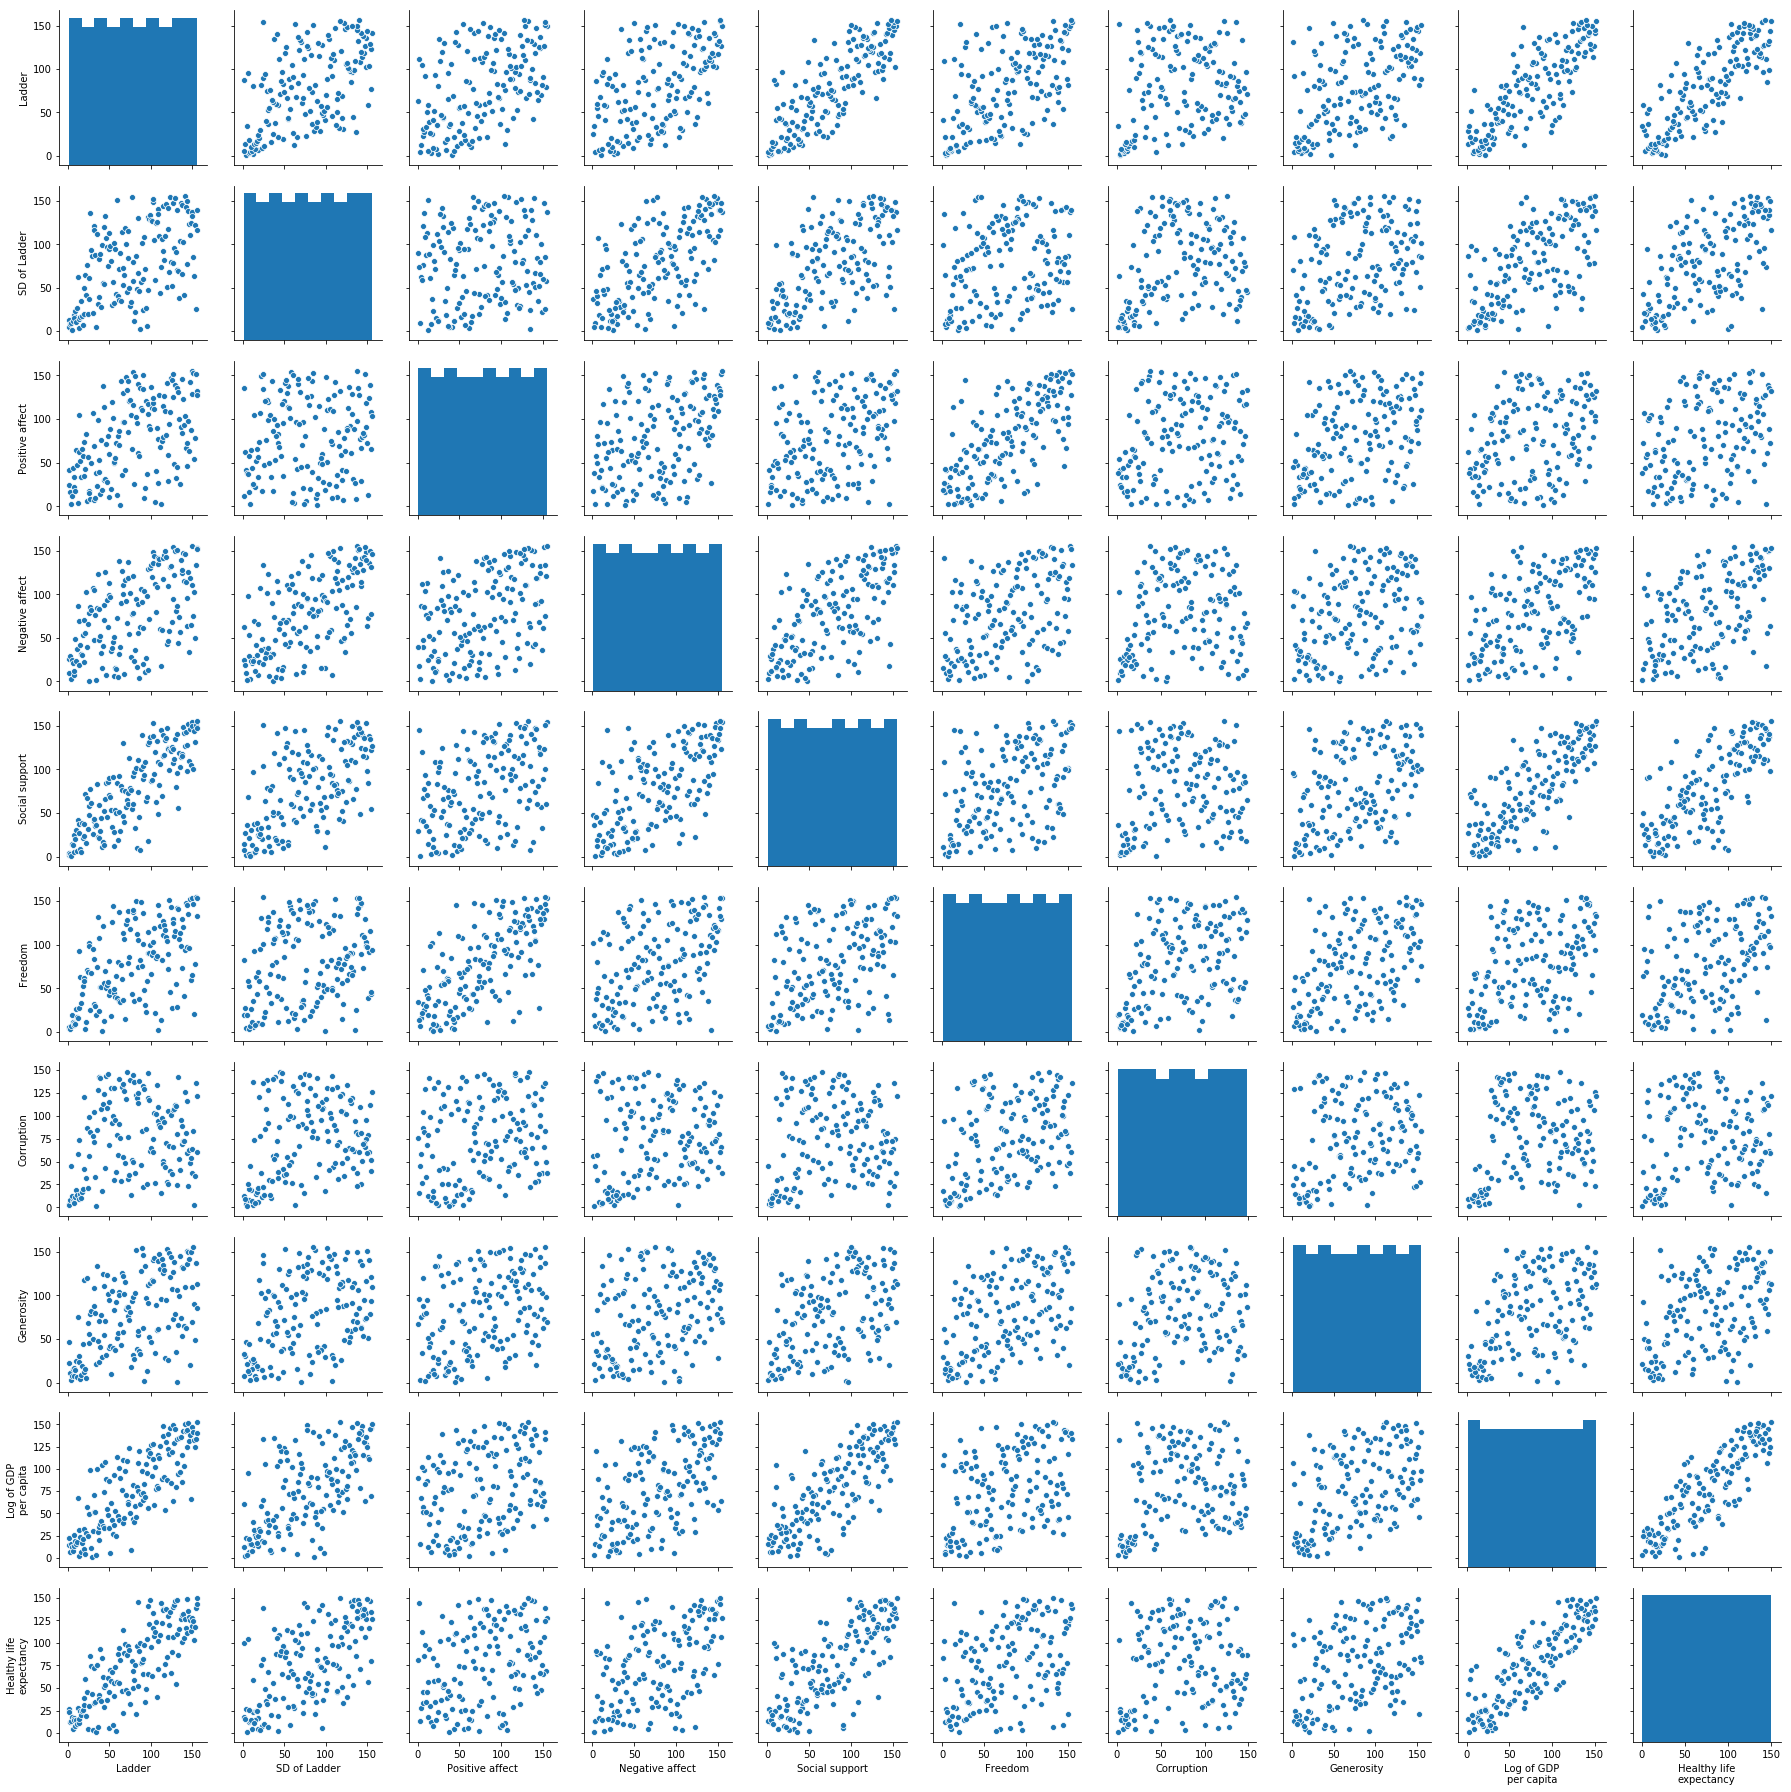

In [5]:
sns.pairplot(df)
plt.show()

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [6]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [7]:
cm = data.corr()
np.cov(cm)

array([[ 0.05521539,  0.02425275,  0.00171214,  0.01849974,  0.05399904,
        -0.00083493, -0.04510796,  0.00605789,  0.05376335,  0.05785363],
       [ 0.02425275,  0.06758195, -0.049305  ,  0.03327596,  0.03867404,
        -0.03625888, -0.02676504, -0.00273542,  0.04363439,  0.04232924],
       [ 0.00171214, -0.049305  ,  0.06592619, -0.00685833, -0.00915835,
         0.04107615, -0.01469851, -0.0019829 , -0.02171504, -0.01602611],
       [ 0.01849974,  0.03327596, -0.00685833,  0.04886965,  0.03276865,
        -0.00954682, -0.03671143, -0.00909765,  0.02413678,  0.02313204],
       [ 0.05399904,  0.03867404, -0.00915835,  0.03276865,  0.06473568,
        -0.01049415, -0.05192108,  0.00272377,  0.0580786 ,  0.06002496],
       [-0.00083493, -0.03625888,  0.04107615, -0.00954682, -0.01049415,
         0.04259461, -0.00108316,  0.00462791, -0.01768791, -0.01434104],
       [-0.04510796, -0.02676504, -0.01469851, -0.03671143, -0.05192108,
        -0.00108316,  0.06813905, -0.01322687

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [8]:
null_columns = data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

в колонке 'Country (region)' нет отсутствующих значений 

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [9]:
len(data['Country (region)'].unique())

156

значения в столбце 'Country (region)' имеют конечное множество конкретных значений (название стран величина конечная) поэтому ответ на вопрос - да, проблема классификации для данного столбца подходит

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

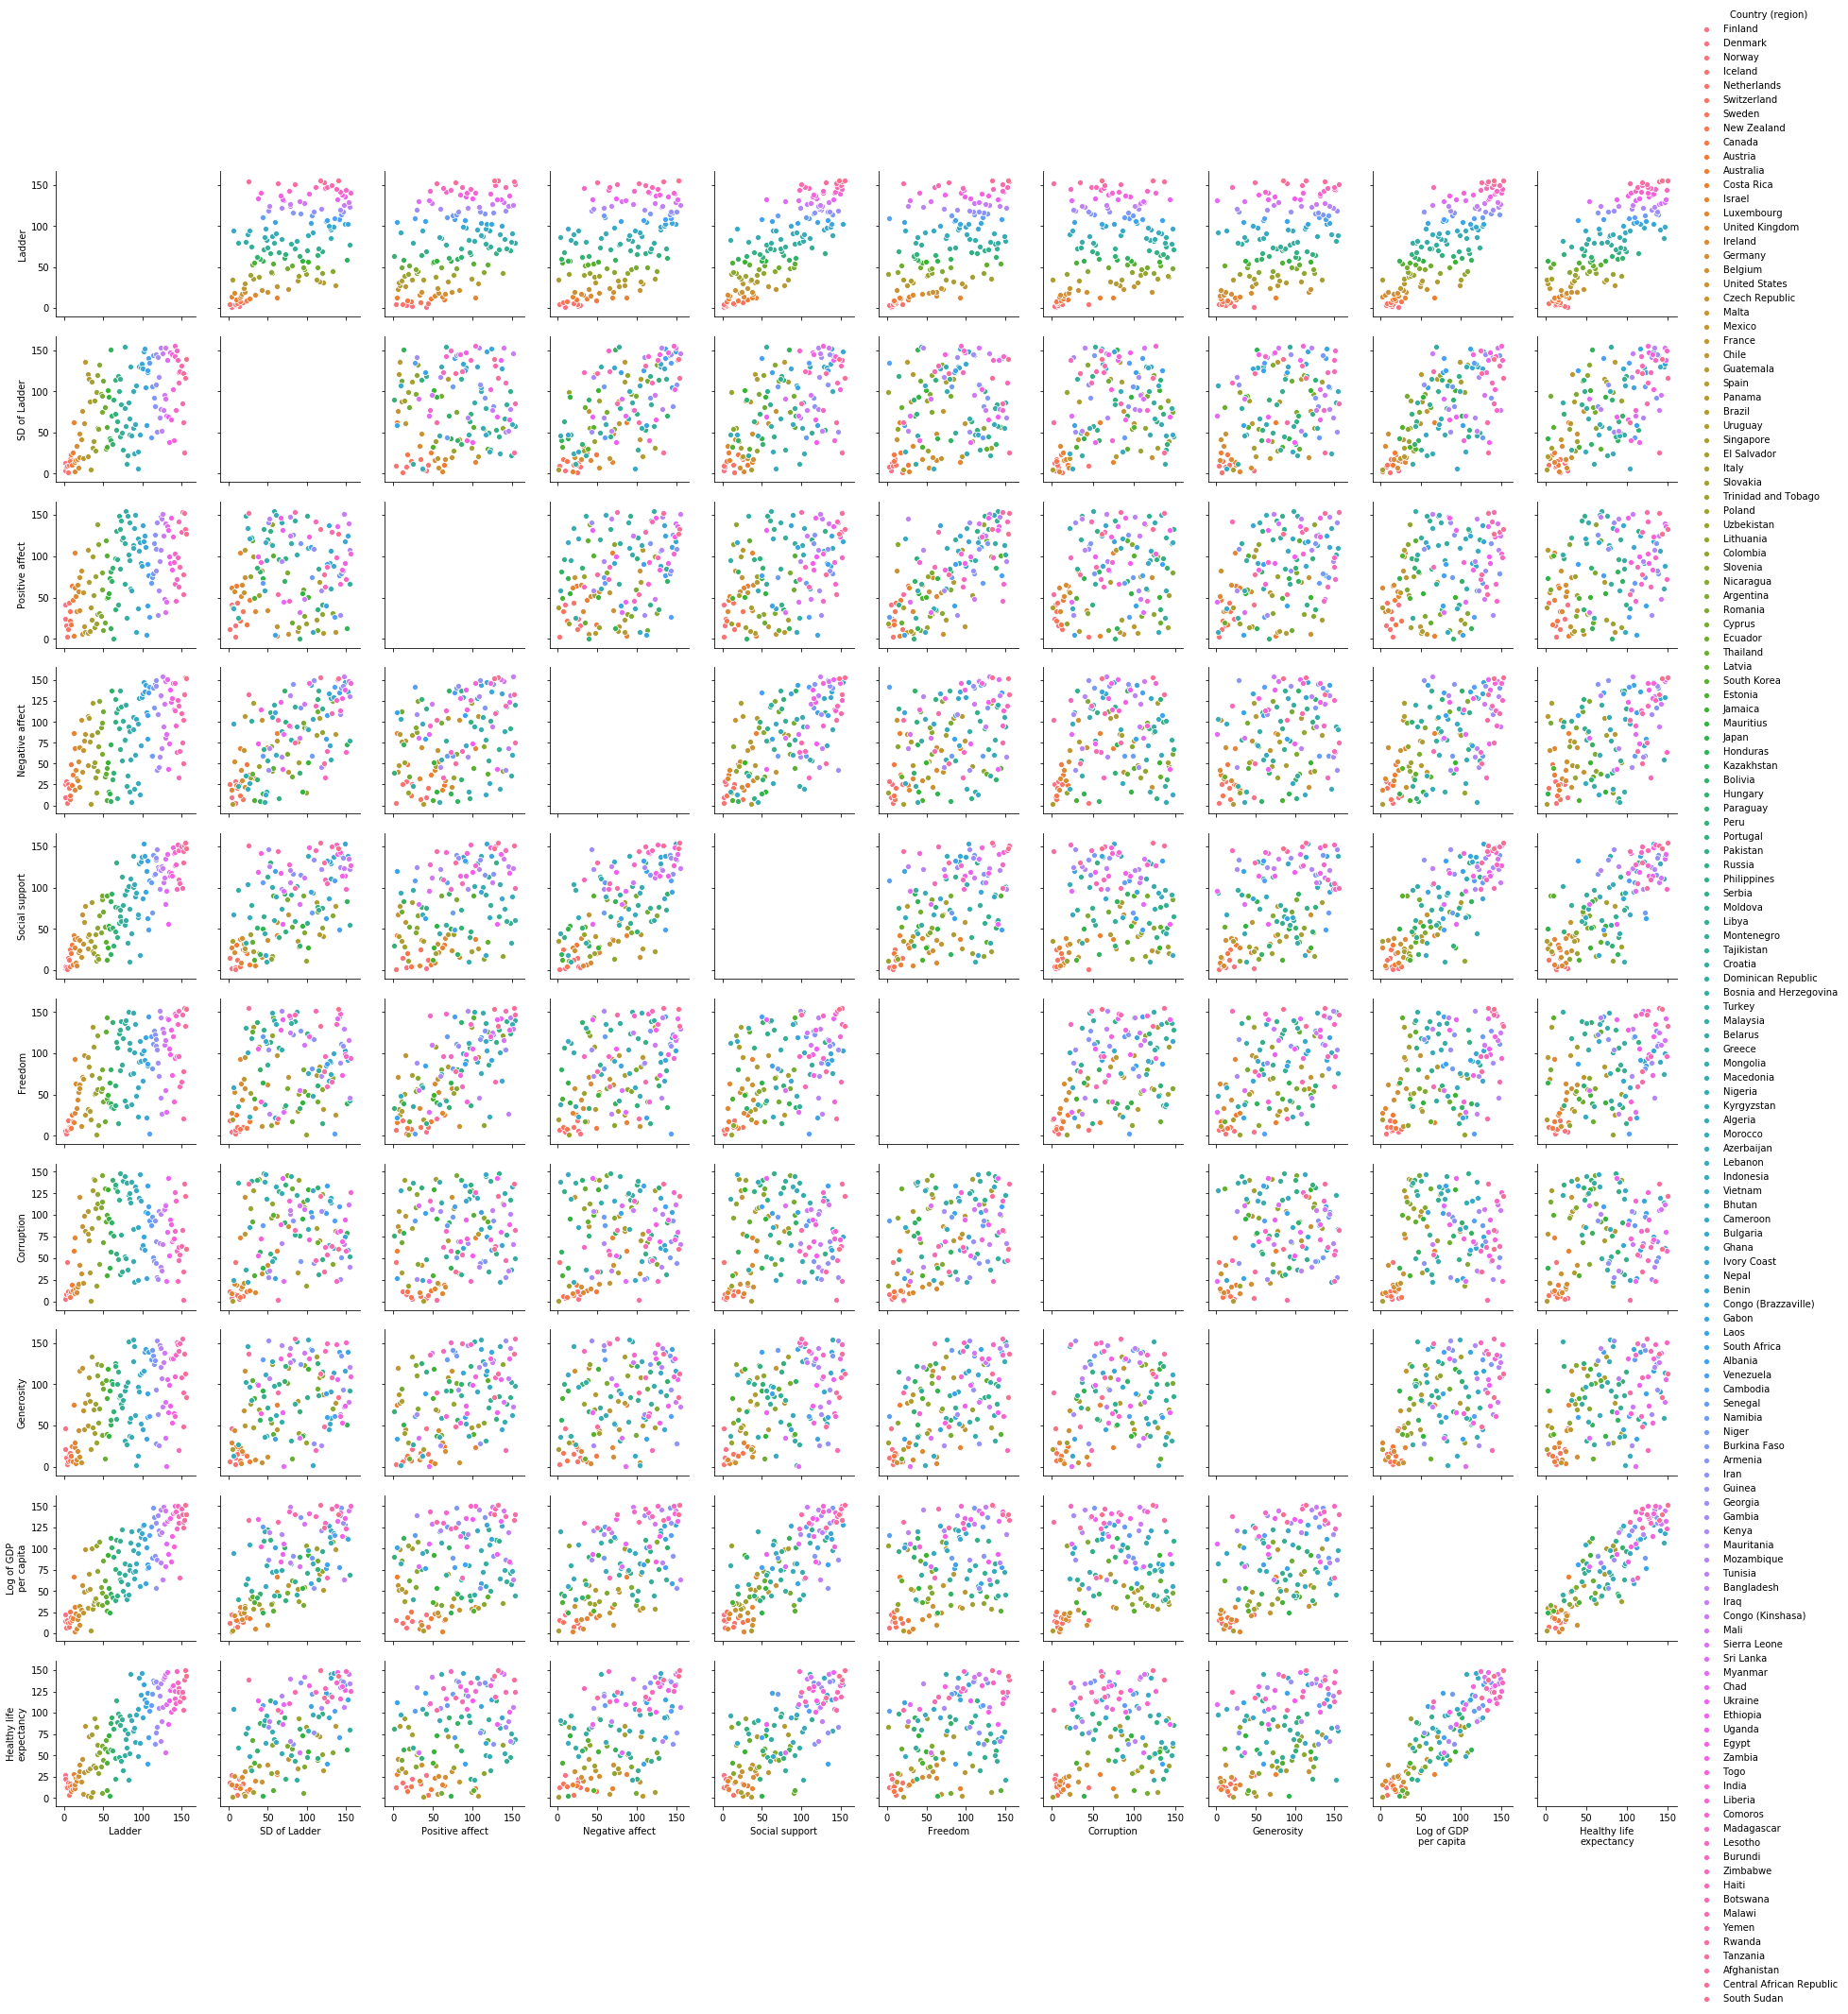

Wall time: 14min 5s


In [13]:
%%time
datana = data.dropna()
# datana.info()
sns.pairplot(data=datana, hue='Country (region)')
plt.show()

видно зависимость между Ladder и Healthy life, заметна также группировка по цветам
на остальных графиках цветовые точки визуально не разделяются по группам. Да и вообще можно заметна зависимость Ladder со всеми параметрами, можно условно разбить весь диапазон параметра на несколько групп и попробовать классифицировать данные

In [18]:
ladder = data['Ladder']
# делим по удовлетворенности на 5 условных групп и даем им значения от 0 до 4
groups_count = 5
groups_border = np.linspace(ladder.min(), ladder.max(), groups_count + 1)


def classify_country_by_ladder(val):
    for i in range(0, groups_count) :
        if val >= groups_border[i] and val < groups_border[i+1] :
            return i
    return groups_count -1

data['Ladder class'] = data['Ladder'].apply(classify_country_by_ladder)
data.head()

# выведем например количество стран в каждой группе
data.groupby('Ladder class').count()['Ladder']

Ladder class
0    31
1    31
2    31
3    31
4    32
Name: Ladder, dtype: int64

In [19]:
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,Ladder class
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,0


C:\Users\gvs\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gvs\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


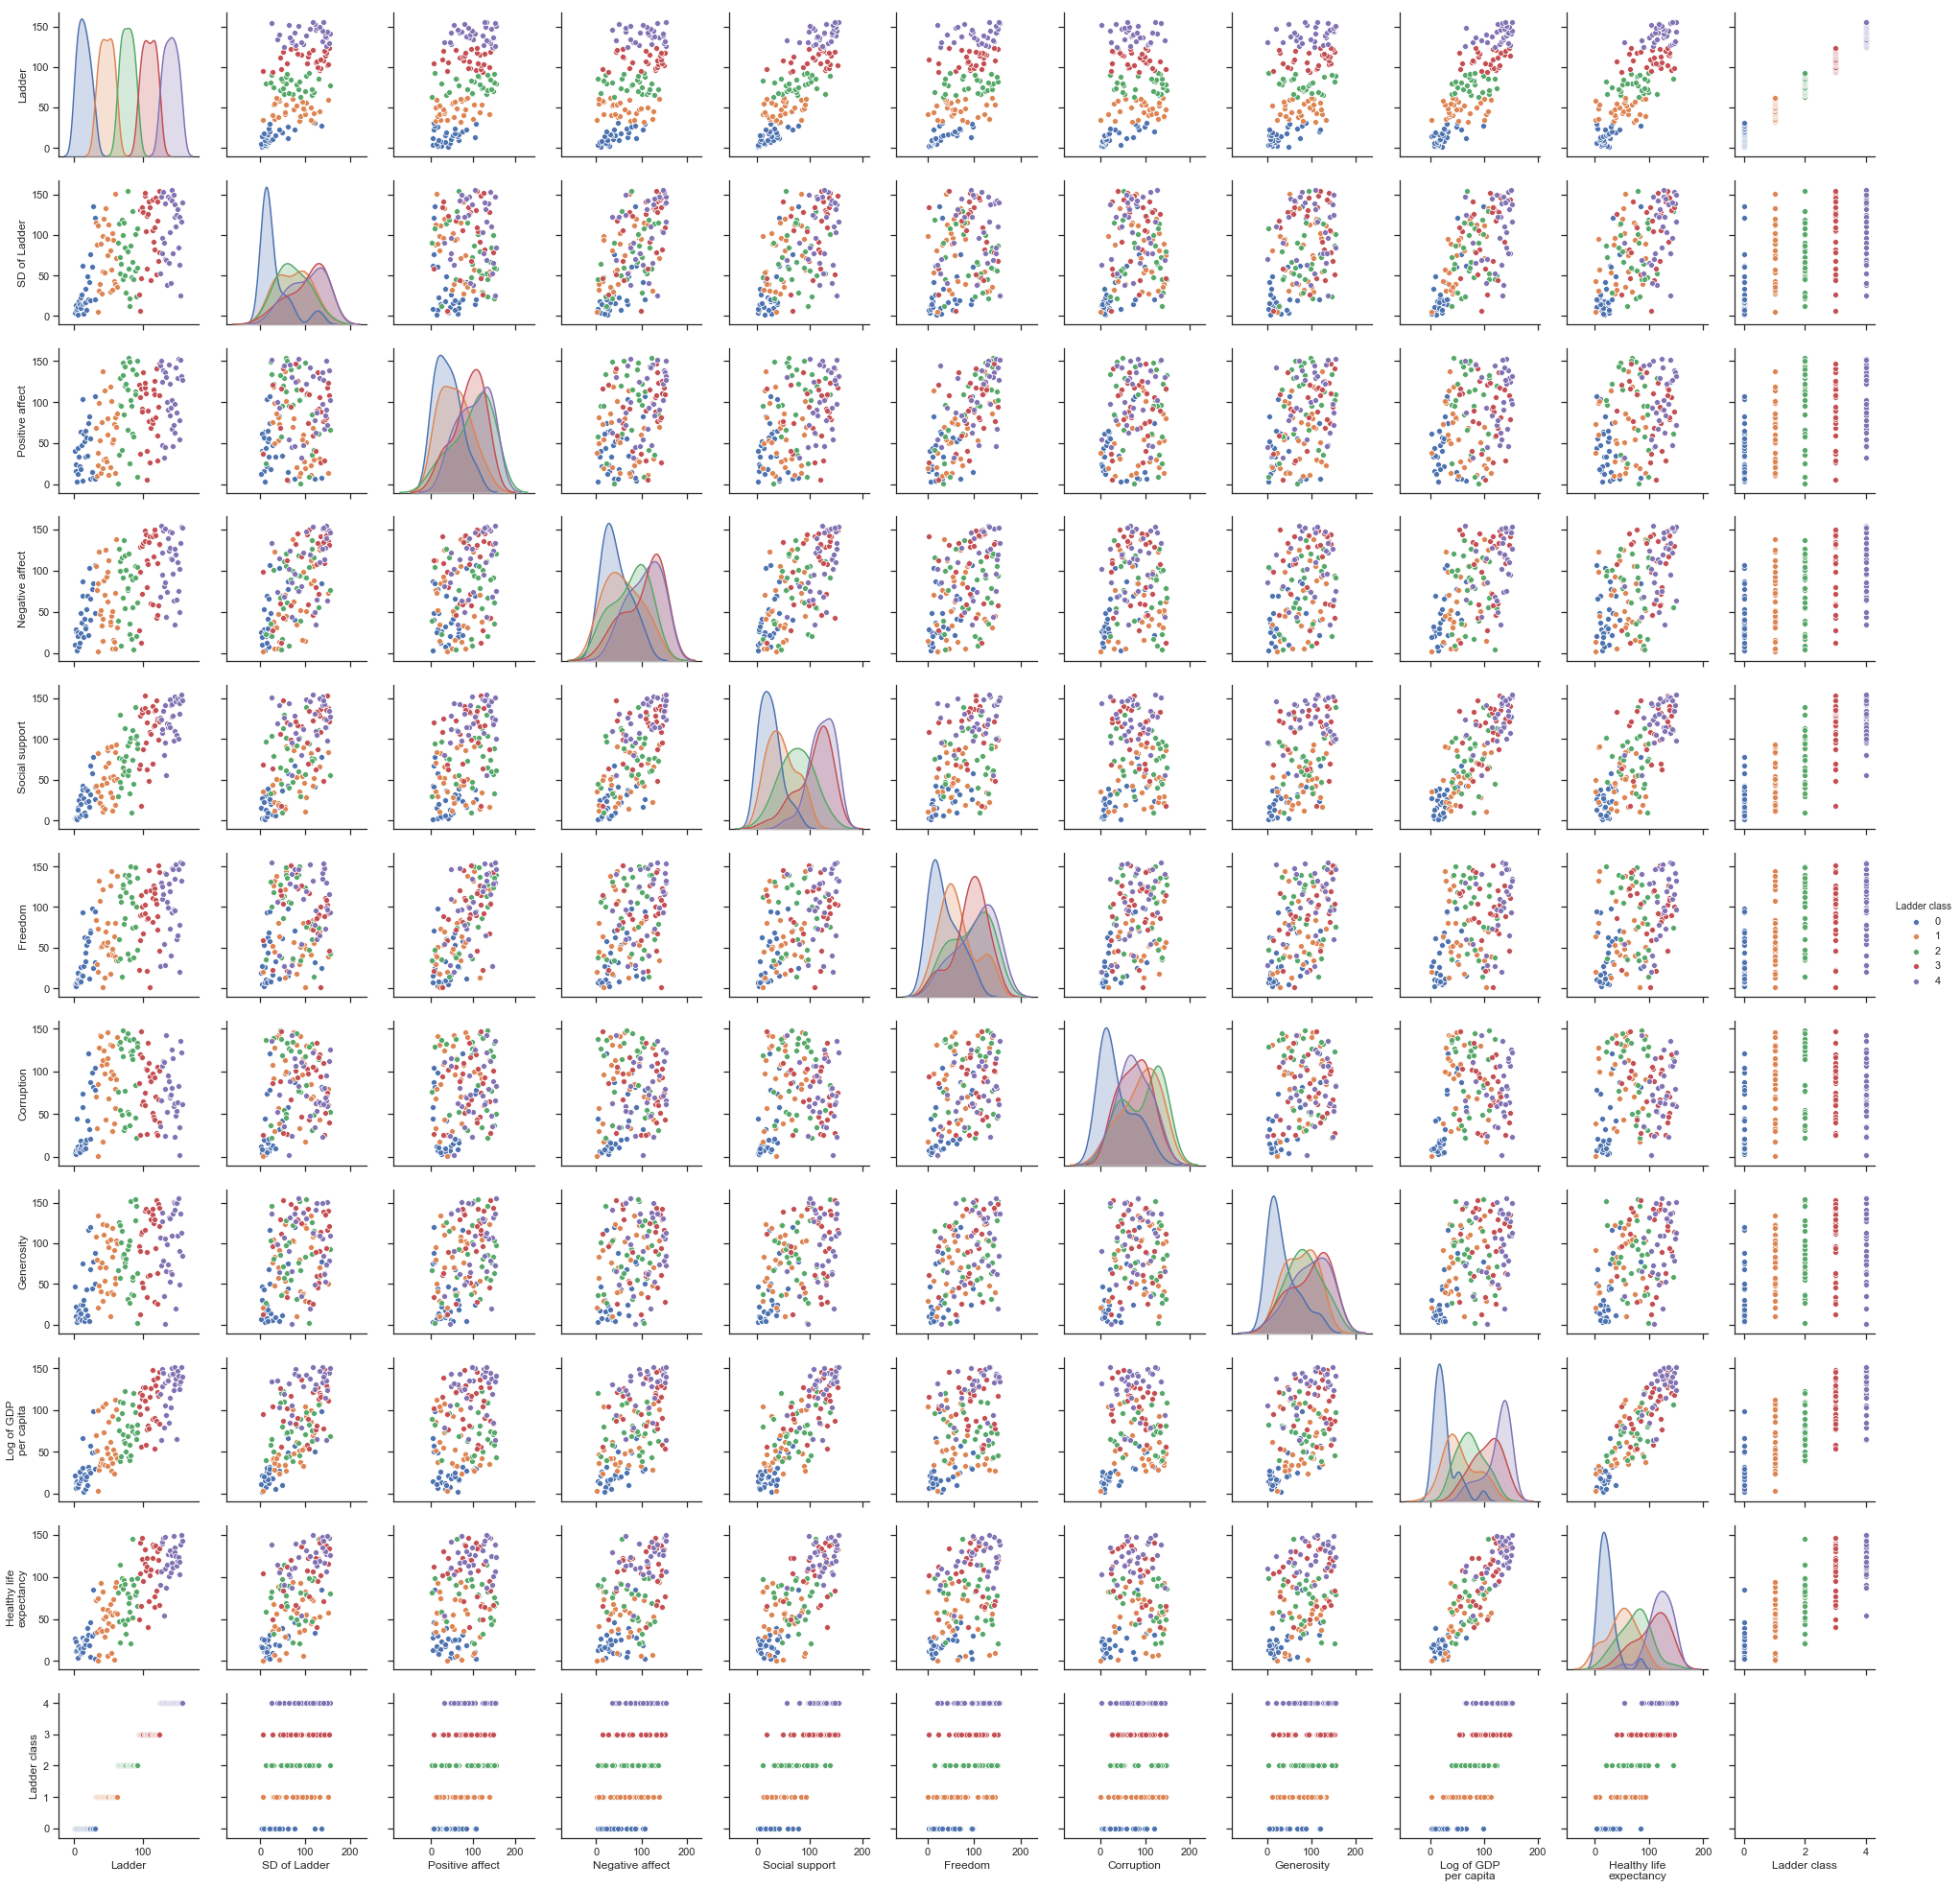

In [22]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data.dropna(), hue='Ladder class')
plt.show()

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

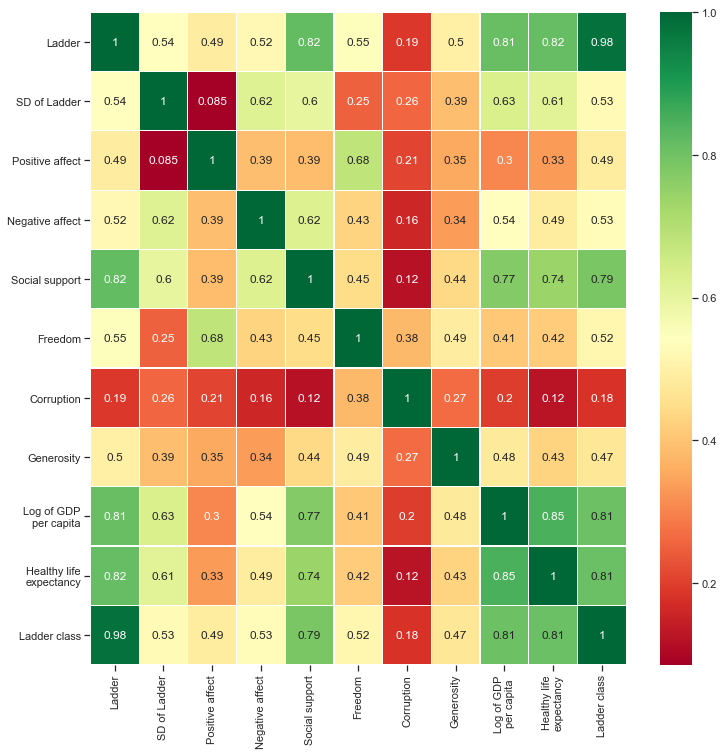

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
Ladder class               156 non-null int64
dtypes: float64(8), int64(3), object(1)
memory usage: 14.7+ KB


In [23]:
corrmtx = data.corr()
sns.heatmap(corrmtx,annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()
data.info()

выводы можно сделать по корреляции величин, например сильно коррелируют значения Healthy life expectancy и Log of GDP per capita. Также большая корреляция между Log of GDP per capita и Social support.

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

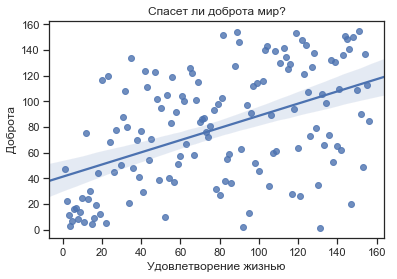

In [24]:
datana = data.dropna();
ladder = datana['Ladder']
generosity = datana['Generosity']
sns.regplot(x = ladder, y = generosity, data = datana, fit_reg = True)
plt.xlabel('Удовлетворение жизнью')
plt.ylabel('Доброта')
plt.title('Спасет ли доброта мир?')
plt.grid(False)
plt.show()

Можно ли сказать, что данная прямая является собственным вектором? - графически это утверждать сложно, но на глаз данные делятся линией примерно пополам и данные "растянуты" вдоль линии - условно можно.
При проецировании данных на эту прямую разброс данных максимален? - визуально при проецировании данных на линию, разброс значений проекций не максимален, если провести линию от левой нижней точки до верхней правой то невооруженным глазом видно что разброс будет больше

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

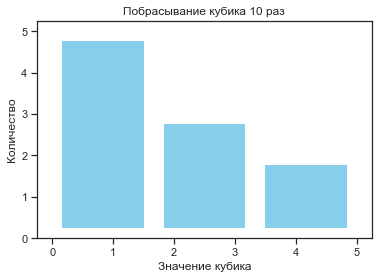

array([2, 0, 1, 0, 5, 4, 2, 1, 0, 3])

In [27]:
rng = np.random.RandomState()
ten_dice_toss = rng.randint(0, 6, size = 10)
ax= sns.distplot(ten_dice_toss,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 20,'alpha':1})
ax.set(xlabel='Значение кубика', ylabel='Количество')
plt.title('Побрасывание кубика 10 раз')
plt.show()
ten_dice_toss

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

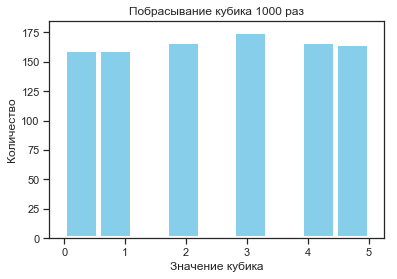

In [29]:
rng = np.random.RandomState()
thousand_dice_toss = rng.randint(0, 6, size = 1000)
ax= sns.distplot(thousand_dice_toss,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Значение кубика', ylabel='Количество')
plt.title('Побрасывание кубика 1000 раз')
plt.show()

Видим что распределение с увеличением количества подбрасываний стремится к равномерному. Если же мы проведем много таких итераций подбрасываний и посчитаем суммы таких распределений то увидим что суммы подвержены нормальному распределению

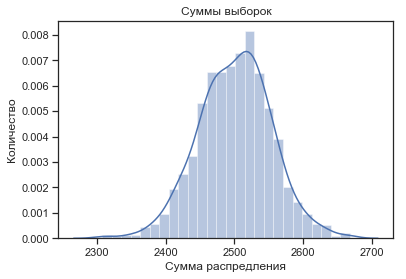

In [30]:
sums = []
for iteration in range(0,1000):
    dice_toss = rng.randint(0, 6, size = 1000)
    sums.append(sum(dice_toss)) 
    
ax= sns.distplot(sums)
ax.set(xlabel='Сумма распредления', ylabel='Количество')
plt.title('Суммы выборок')
plt.show()